In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class VGG16(tf.keras.Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')
        self.b1 = keras.layers.BatchNormalization()
        self.a1 = keras.layers.Activation('relu')
        self.c2 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')
        self.b2 = keras.layers.BatchNormalization()
        self.a2 = keras.layers.Activation('relu')
        self.p1 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = keras.layers.Dropout(0.2)
        
        self.c3 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = keras.layers.BatchNormalization()
        self.a3 = keras.layers.Activation('relu')
        self.c4 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = keras.layers.BatchNormalization()
        self.a4 = keras.layers.Activation('relu')
        self.p2 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = keras.layers.Dropout(0.2)
        
        self.c5 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = keras.layers.BatchNormalization()
        self.a5 = keras.layers.Activation('relu')
        self.c6 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = keras.layers.BatchNormalization()
        self.a6 = keras.layers.Activation('relu')
        self.c7 = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = keras.layers.BatchNormalization()
        self.a7 = keras.layers.Activation('relu')
        self.p3 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = keras.layers.Dropout(0.2)
        
        self.c8 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = keras.layers.BatchNormalization()
        self.a8 = keras.layers.Activation('relu')
        self.c9 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = keras.layers.BatchNormalization()
        self.a9 = keras.layers.Activation('relu')
        self.c10 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = keras.layers.BatchNormalization()
        self.a10 = keras.layers.Activation('relu')
        self.p4 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = keras.layers.Dropout(0.2)
        
        self.c11 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = keras.layers.BatchNormalization()
        self.a11 = keras.layers.Activation('relu')
        self.c12 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = keras.layers.BatchNormalization()
        self.a12 = keras.layers.Activation('relu')
        self.c13 = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = keras.layers.BatchNormalization()
        self.a13 = keras.layers.Activation('relu')
        self.p5 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = keras.layers.Dropout(0.2) 
        
        self.flatten = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(512, activation='relu')
        self.d6 = keras.layers.Dropout(0.2)
        self.fc2 = keras.layers.Dense(512, activation='relu')
        self.d7 = keras.layers.Dropout(0.2)
        self.fc3 = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)
        
        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)
        
        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)
        
        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)
        
        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.d6(x)
        x = self.fc2(x)
        x = self.d7(x)
        y = self.fc3(x)
        return y

In [4]:
model = VGG16()
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 799s 16ms/sample - loss: 1.6419 - sparse_categorical_accuracy: 0.3544 - val_loss: 1.4918 - val_sparse_categorical_accuracy: 0.4316
Epoch 2/10
50000/50000 [==============================] - 791s 16ms/sample - loss: 1.3109 - sparse_categorical_accuracy: 0.5184 - val_loss: 1.1122 - val_sparse_categorical_accuracy: 0.5918
Epoch 3/10
50000/50000 [==============================] - 789s 16ms/sample - loss: 1.0823 - sparse_categorical_accuracy: 0.6171 - val_loss: 0.9724 - val_sparse_categorical_accuracy: 0.6594
Epoch 4/10
50000/50000 [==============================] - 791s 16ms/sample - loss: 0.9270 - sparse_categorical_accuracy: 0.6857 - val_loss: 1.1065 - val_sparse_categorical_accuracy: 0.6346
Epoch 5/10
50000/50000 [==============================] - 789s 16ms/sample - loss: 0.8193 - sparse_categorical_accuracy: 0.7302 - val_loss: 0.9985 - val_sparse_categorical_accuracy: 0.6833
Epoch

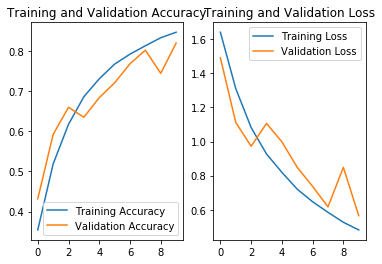

In [8]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [6]:
model.summary()

Model: "vg_g16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0    